In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv


In [2]:
data = pd.read_csv('/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.shape

(10000, 14)

# Data Preprocessing:

**Check Null value are present in the dataset or not**

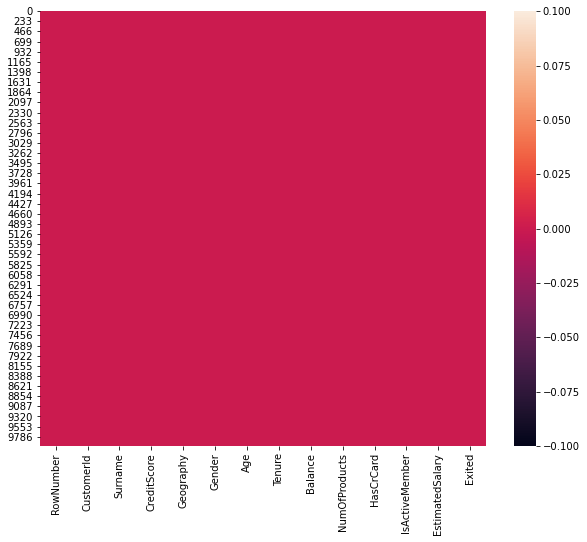

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(),annot=False);

Let's find how many categorical varibles are there and which value it contains

In [6]:
# Printing Unique Values of the categorical variables
print(data['Geography'].unique())
print(data['Gender'].unique())
print(data['NumOfProducts'].unique())
print(data['HasCrCard'].unique())
print(data['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber,CustomerID,Surname these column are not going to help to predict the customer churn so will delete those columns

In [8]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [9]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


we can see Credit score is as expected is in between 350 to 850

# Let's Do some EDA to understand The data

In [11]:
#let's check that our dataset is balanced or imbalanced
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

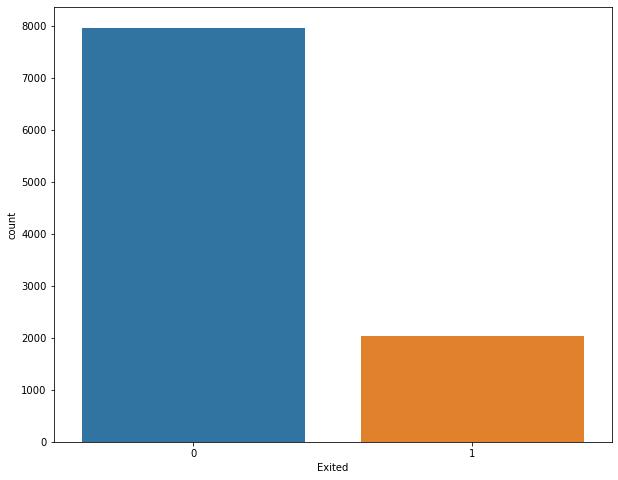

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='Exited',data=data);

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
##Changing the name of Exited column as Churn 
data.loc[(data['Exited'] == 0), 'Churn'] = 'Non-Churn'
data.loc[(data['Exited'] == 1), 'Churn'] = 'Churn'
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Non-Churn
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Non-Churn
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Non-Churn


<AxesSubplot:ylabel='Churn'>

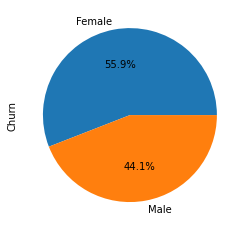

In [15]:
freq = pd.crosstab(data['Gender'],data['Churn'])
freq['Churn'].plot(kind='pie',autopct='%1.1f%%')

From Above Pie digram we can conclude that more female are leaving the bank
> Now Let's check Geographically Churn rate

<AxesSubplot:ylabel='Churn'>

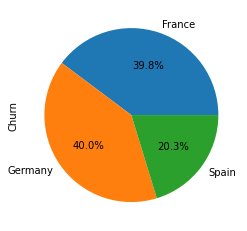

In [16]:
freq = pd.crosstab(data['Geography'],data['Churn'])
freq['Churn'].plot(kind='pie',autopct='%1.1f%%')

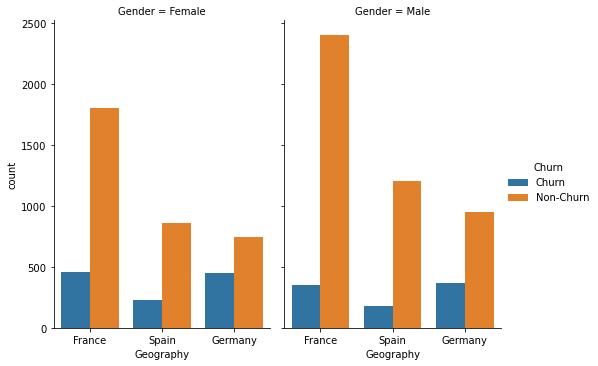

In [17]:
sns.catplot(x='Geography',hue='Churn',col='Gender',
            data=data,
           height=5,aspect=.7,kind='count');

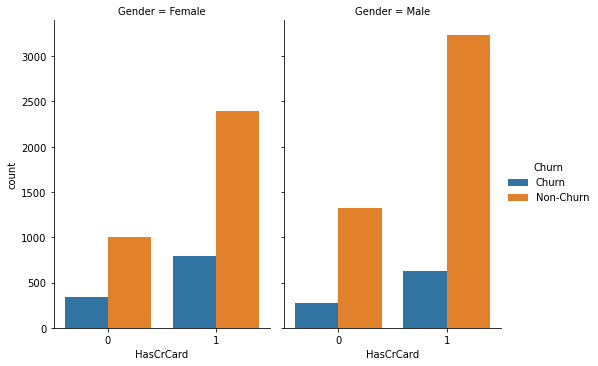

In [18]:
sns.catplot(x='HasCrCard',hue='Churn',col='Gender',
            data=data,
           height=5,aspect=.7,kind='count');

In [19]:
##Grouping ages to investigate age group effect on the churn decision 
## Student: under Age 25, Employee: Age 25- 64, Retired: Age 65 and older
data.loc[(data['Age'] < 25), 'AgeGroup'] = 'Under age 25'
data.loc[(data['Age'] >= 25) & (data['Age']<= 64), 'AgeGroup'] = 'Age 25-64'
data.loc[(data['Age'] >= 65), 'AgeGroup'] = 'Age 65 and older'
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Churn,Age 25-64
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Non-Churn,Age 25-64
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Churn,Age 25-64
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Non-Churn,Age 25-64
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Non-Churn,Age 25-64


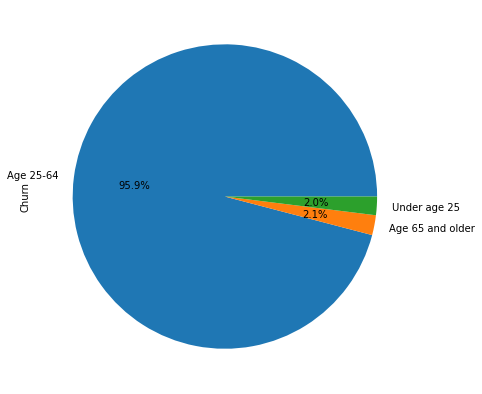

In [20]:
plt.figure(figsize=(7,7))
pie = pd.crosstab(data['AgeGroup'],data['Churn'])
pie['Churn'].plot(kind='pie',autopct='%1.1f%%');

Age Group 25-64 -> are the people who leaving the bank mostly

In [21]:
#As we converted Age into Categorical varible now we can delete Age Column.
# Also deleting churn column as we already having Exited Column there
data.drop(['Age','Churn'],axis=1,inplace=True)

In [22]:
data.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,2,0.00,1,1,1,101348.88,1,Age 25-64
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0,Age 25-64
2,502,France,Female,8,159660.80,3,1,0,113931.57,1,Age 25-64
3,699,France,Female,1,0.00,2,0,0,93826.63,0,Age 25-64
4,850,Spain,Female,2,125510.82,1,1,1,79084.10,0,Age 25-64


In [23]:
geography = pd.get_dummies(data['Geography'],drop_first=True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [24]:
data = pd.concat([data,geography],axis=1)

In [25]:
age_group = pd.get_dummies(data['AgeGroup'],drop_first=True)
age_group.head()

,Age 65 and older,Under age 25
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [26]:
data = pd.concat([data,age_group],axis=1)

In [27]:
data.drop('AgeGroup',axis=1,inplace=True)

In [28]:
data.drop('Geography',axis=1,inplace=True)

In [29]:
gender_dict = {
    'Female':0,
    'Male':1
}
data['Gender'] = data['Gender'].replace(gender_dict)

In [30]:
data.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Age 65 and older,Under age 25
0,619,0,2,0.00,1,1,1,101348.88,1,0,0,0,0
1,608,0,1,83807.86,1,0,1,112542.58,0,0,1,0,0
2,502,0,8,159660.80,3,1,0,113931.57,1,0,0,0,0
3,699,0,1,0.00,2,0,0,93826.63,0,0,0,0,0
4,850,0,2,125510.82,1,1,1,79084.10,0,0,1,0,0


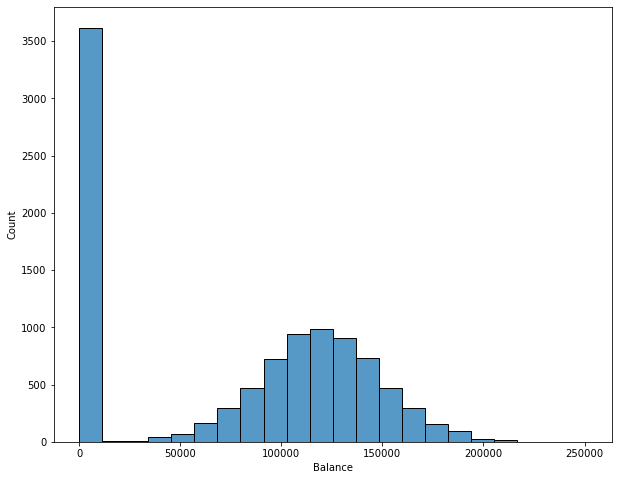

In [31]:
plt.figure(figsize=(10,8))
sns.histplot(data['Balance']);

In [32]:
from sklearn.preprocessing import StandardScaler
cols = ['CreditScore','Balance','EstimatedSalary']
sc = StandardScaler()
for col in cols:
    data[col] = sc.fit_transform(data[col].values.reshape(-1,1))

In [33]:
data.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Age 65 and older,Under age 25
0,-0.326221,0,2,-1.225848,1,1,1,0.021886,1,0,0,0,0
1,-0.440036,0,1,0.117350,1,0,1,0.216534,0,0,1,0,0
2,-1.536794,0,8,1.333053,3,1,0,0.240687,1,0,0,0,0
3,0.501521,0,1,-1.225848,2,0,0,-0.108918,0,0,0,0,0
4,2.063884,0,2,0.785728,1,1,1,-0.365276,0,0,1,0,0



# Build Model

In [34]:
#Split train and test dataset
X = data.drop('Exited',axis=1)
y = data['Exited']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

models = {
     'RandomForestRegressor': RandomForestClassifier(),
    'DecisionTreeRegressor':DecisionTreeClassifier(),
    'LogisticRegression':LogisticRegression(),
    'KNeighborsRegressor':KNeighborsClassifier()
}

****************************************************************************************************
	 	 	 	 	 Start  RandomForestRegressor Model Training....
****************************************************************************************************
[0 0 0 ... 1 0 1]
Training Score :  1.0
Testing Score :  0.83
Accuracy Score :  0.83


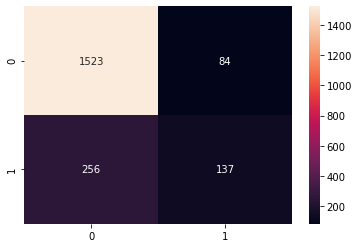

####################################################################################################
****************************************************************************************************
	 	 	 	 	 Start  DecisionTreeRegressor Model Training....
****************************************************************************************************
[0 0 0 ... 1 0 0]
Training Score :  1.0
Testing Score :  0.758
Accuracy Score :  0.758


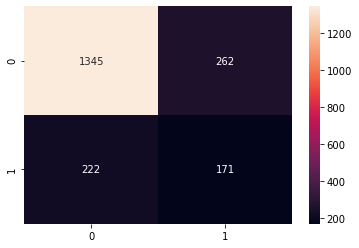

####################################################################################################
****************************************************************************************************
	 	 	 	 	 Start  LogisticRegression Model Training....
****************************************************************************************************
[0 0 0 ... 0 0 0]
Training Score :  0.795375
Testing Score :  0.8075
Accuracy Score :  0.8075


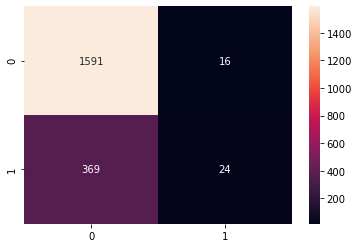

####################################################################################################
****************************************************************************************************
	 	 	 	 	 Start  KNeighborsRegressor Model Training....
****************************************************************************************************
[0 0 0 ... 1 1 1]
Training Score :  0.842875
Testing Score :  0.801
Accuracy Score :  0.801


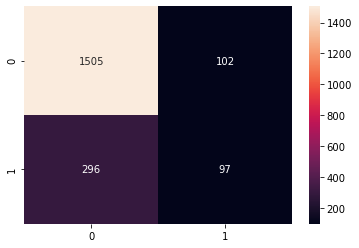

####################################################################################################


In [39]:
for name,model in models.items():
    print('*'*100)
    print('\t \t \t \t \t Start ',name,'Model Training....')
    print('*'*100)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(y_pred)
    print('Training Score : ',model.score(X_train,y_train))
    print('Testing Score : ',model.score(X_test,y_test))
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
    plt.show()
    print('#'*100)

In [40]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred = rf.predict(X_test)

In [42]:

from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[1524   83]
 [ 258  135]]
0.8295


In [ ]:
# pickling the Model
import pickle
file = open('Customer_Churn_Prediction.pkl', 'wb')
pickle.dump(rf, file)